In [2]:
import serial

In [3]:
ser = serial.Serial(port="COM3", baudrate=115200, bytesize=serial.EIGHTBITS, parity=serial.PARITY_NONE, stopbits=serial.STOPBITS_ONE)

In [59]:
ser.close()
ser.open()

In [51]:
from collections import namedtuple

Datapoint = namedtuple('Datapoint', ('update_time', 'delta_t', 'valve_motion_state', 'water_level', 'water_level_reading',
                                    'i2', 'i', 'error', 'd', 'd2', 'activation', 'to_move'))

In [52]:
import struct

decoder = struct.Struct('<2LhB7fl')

In [55]:
def iter_readings():
    while ser.is_open:
        ser.read_until(b'\xDE\xAD\xBE\xEF')
        data = ser.read(43)
        unpacked_data = decoder.unpack(data)
        yield Datapoint(*unpacked_data)
        

In [9]:
import pandas as pd

In [41]:
0.9 ** (26 / 1000) * 146.164993 + 0.1 ** (26/1000) * 13

158.0097051827213

In [60]:
import itertools
it = itertools.islice(iter_readings(), 10000)
df = pd.DataFrame(data=it)

display(df)

,update_time,delta_t,valve_motion_state,water_level,water_level_reading,i2,i,error,d,d2,activation,to_move
0,0,0,0,13,13.0,0.000000e+00,0.0,4.0,0.0,0.0,-4.000000e+00,-4
1,25,25,0,13,13.0,2.500000e+03,100.0,4.0,0.0,0.0,-6.600000e+00,-10
2,51,26,0,13,13.0,7.804000e+03,204.0,4.0,0.0,0.0,-1.200800e+01,-22
3,76,25,0,13,13.0,1.540400e+04,304.0,4.0,0.0,0.0,-1.970800e+01,-41
4,103,27,0,13,13.0,2.652800e+04,412.0,4.0,0.0,0.0,-3.094000e+01,-71
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,260077,27,-1,13,13.0,1.352938e+11,1040308.0,4.0,0.0,0.0,-1.352949e+08,-3500
9996,260103,26,-1,13,13.0,1.353209e+11,1040412.0,4.0,0.0,0.0,-1.353219e+08,-3500
9997,260129,26,-1,13,13.0,1.353479e+11,1040516.0,4.0,0.0,0.0,-1.353490e+08,-3500
9998,260155,26,-1,13,13.0,1.353750e+11,1040620.0,4.0,0.0,0.0,-1.353760e+08,-3500


In [21]:
from matplotlib import pyplot as plt

In [22]:
df.columns

Index(['update_time', 'delta_t', 'valve_motion_state', 'water_level',
       'water_level_reading', 'i2', 'i', 'error', 'd', 'd2', 'activation'],
      dtype='object')

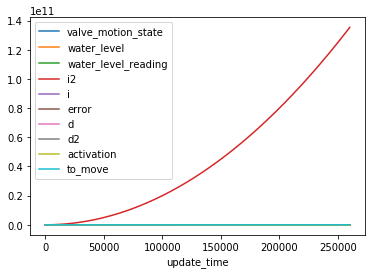

In [61]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=(x for x in df.columns if x != 'update_time'),ax=ax)

plt.show()

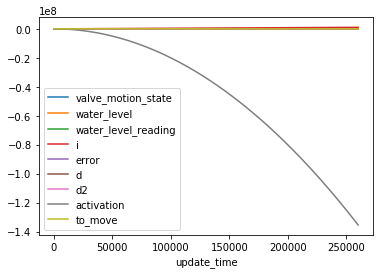

In [62]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=(x for x in df.columns if x not in {'update_time', 'i2'}),ax=ax)

plt.show()

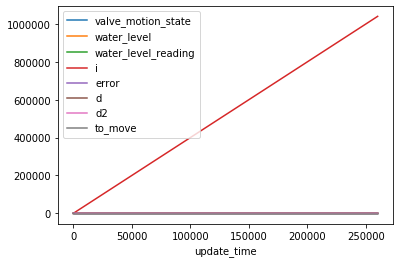

In [63]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=(x for x in df.columns if x not in {'update_time', 'i2', 'activation'}),ax=ax)

plt.show()

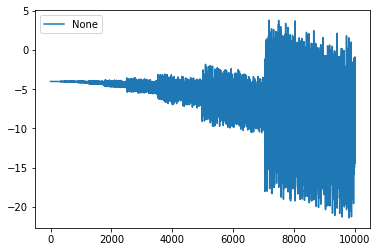

In [66]:
ax = plt.gca()

(df['activation'] + df['i2'] * 1.0e-3 + df['i'] * 1.0e-3).plot(kind='line', x=df['update_time'], ax=ax)
#(df['activation']).plot(kind='line', x=df['update_time'], ax=ax)
#(df['i2']).plot(kind='line', x=df['update_time'], ax=ax)
#(df['i']).plot(kind='line', x=df['update_time'], ax=ax)

plt.legend()
plt.show()

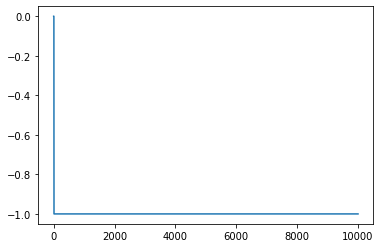

In [67]:
ax = plt.gca()

(df['valve_motion_state']).plot(kind='line', x=df['update_time'], ax=ax)

plt.show()